<a href="https://colab.research.google.com/github/Rehima1/African-Credit-Scoring-Challenge/blob/main/African_Credit_Scoring_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
economic_indicators = pd.read_csv('economic_indicators.csv')

print("Train DataFrame columns:", train.columns)
print("Economic Indicators DataFrame columns:", economic_indicators.columns)


economic_indicators.rename(columns={'Country': 'country_id'}, inplace=True)
train = train.merge(economic_indicators, how='left', on='country_id')
test = test.merge(economic_indicators, how='left', on='country_id')


Train DataFrame columns: Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target'],
      dtype='object')
Economic Indicators DataFrame columns: Index(['Country', 'Indicator', 'YR2001', 'YR2002', 'YR2003', 'YR2004',
       'YR2005', 'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011',
       'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018',
       'YR2019', 'YR2020', 'YR2021', 'YR2022', 'YR2023'],
      dtype='object')


In [ ]:
train

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
1,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,87.922164,98.178453,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384
2,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,8.249079,6.268806,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517
3,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,NaN,NaN
4,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,8.373380,9.188945,8.688626,7.674123,8.292700,7.506070,6.968703,6.686974,7.145176,9.167690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617881,ID_249117268933267278,249117,Kenya,268933,267278,Type_1,22695.0,22695.0,2022-09-27,2022-10-04,...,8.373380,9.188945,8.688626,7.674123,8.292700,7.506070,6.968703,6.686974,7.145176,9.167690
617882,ID_249117268933267278,249117,Kenya,268933,267278,Type_1,22695.0,22695.0,2022-09-27,2022-10-04,...,16.513931,16.086614,16.559631,13.667573,13.060759,12.441133,11.995785,12.079998,12.335841,13.588502
617883,ID_249117268933267278,249117,Kenya,268933,267278,Type_1,22695.0,22695.0,2022-09-27,2022-10-04,...,8.140551,6.897669,7.871005,5.993449,4.768059,4.935063,5.027081,5.393025,5.190665,4.420812
617884,ID_249117268933267278,249117,Kenya,268933,267278,Type_1,22695.0,22695.0,2022-09-27,2022-10-04,...,17.379573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
1,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,...,87.922164,98.178453,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384
2,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,...,8.249079,6.268806,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517
3,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,NaN,NaN
4,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,...,8.373380,9.188945,8.688626,7.674123,8.292700,7.506070,6.968703,6.686974,7.145176,9.167690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167341,ID_248929241821267278,248929,Kenya,241821,267278,Type_1,4038.0,4038.0,2022-08-22,2022-08-29,...,8.373380,9.188945,8.688626,7.674123,8.292700,7.506070,6.968703,6.686974,7.145176,9.167690
167342,ID_248929241821267278,248929,Kenya,241821,267278,Type_1,4038.0,4038.0,2022-08-22,2022-08-29,...,16.513931,16.086614,16.559631,13.667573,13.060759,12.441133,11.995785,12.079998,12.335841,13.588502
167343,ID_248929241821267278,248929,Kenya,241821,267278,Type_1,4038.0,4038.0,2022-08-22,2022-08-29,...,8.140551,6.897669,7.871005,5.993449,4.768059,4.935063,5.027081,5.393025,5.190665,4.420812
167344,ID_248929241821267278,248929,Kenya,241821,267278,Type_1,4038.0,4038.0,2022-08-22,2022-08-29,...,17.379573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def check_null_values(df, name):
    print(f"\n{name} Null Values:\n", df.isnull().sum())

check_null_values(economic_indicators, "Economic Indicators")


numeric_columns = economic_indicators.select_dtypes(include=np.number).columns


economic_indicators[numeric_columns] = economic_indicators[numeric_columns].fillna(economic_indicators[numeric_columns].mean())


Economic Indicators Null Values:
 country_id     0
Indicator      0
YR2001         7
YR2002         7
YR2003         7
YR2004         7
YR2005         3
YR2006         3
YR2007         3
YR2008         3
YR2009         3
YR2010         3
YR2011         3
YR2012         3
YR2013         3
YR2014         3
YR2015         6
YR2016         6
YR2017         6
YR2018        10
YR2019        10
YR2020        10
YR2021        10
YR2022        13
YR2023        13
dtype: int64


In [ ]:

date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    train[col] = pd.to_datetime(train[col])
    train[col+'_month'] = train[col].dt.month
    train[col+'_day'] = train[col].dt.day
    train[col+'_year'] = train[col].dt.year

date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    test[col] = pd.to_datetime(train[col])
    test[col+'_month'] = test[col].dt.month
    test[col+'_day'] = test[col].dt.day
    test[col+'_year'] = test[col].dt.year

In [ ]:
unique_indicators = economic_indicators['Indicator'].unique()

print(unique_indicators)

['Inflation, consumer prices (annual %)'
 'Official exchange rate (LCU per US$, period average)'
 'Real interest rate (%)' 'Average precipitation in depth (mm per year)'
 'Deposit interest rate (%)' 'Lending interest rate (%)'
 'Interest rate spread (lending rate minus deposit rate, %)'
 'Fossil fuel energy consumption (% of total)' 'Unemployment rate']


In [ ]:
import pandas as pd

indicators = [
    'Inflation, consumer prices (annual %)',
    'Official exchange rate (LCU per US$, period average)',
    'Real interest rate (%)',
    'Average precipitation in depth (mm per year)',
    'Deposit interest rate (%)',
    'Lending interest rate (%)',
    'Interest rate spread (lending rate minus deposit rate, %)',
    'Fossil fuel energy consumption (% of total)',
    'Unemployment rate'
]

filtered_data = economic_indicators[economic_indicators['Indicator'].isin(indicators)]

filtered_data = filtered_data.rename(columns={'Country': 'country_id'})

reshaped_data = filtered_data.melt(
    id_vars=['country_id', 'Indicator'],
    var_name='Year',
    value_name='Value'
)

reshaped_data['Year'] = reshaped_data['Year'].str.extract('(\d+)').astype(int)

pivoted_data = reshaped_data.pivot_table(
    index=['country_id', 'Year'],
    columns='Indicator',
    values='Value',
    aggfunc='first'
).reset_index()

pivoted_data = pivoted_data.reset_index()
for df_name in ['train', 'test']:
    df = globals()[df_name]
    df['disbursement_date'] = pd.to_datetime(df['disbursement_date'])
    if 'Year' not in df.columns:
        df['Year'] = df['disbursement_date'].dt.year
    df['Year'] = df['Year'].astype(int)
    df = pd.merge(df, pivoted_data, on=['country_id', 'Year'], how='left')
    globals()[df_name] = df


In [ ]:

numeric_cols = train.select_dtypes(include=np.number).columns
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].mean())

numeric_cols_test = test.select_dtypes(include=np.number).columns
test[numeric_cols_test] = test[numeric_cols_test].fillna(test[numeric_cols_test].mean())

In [ ]:
train['interest_rate'] = (train['Total_Amount_to_Repay'] - train['Total_Amount']) / train['Total_Amount'] * 100
test['interest_rate'] = (test['Total_Amount_to_Repay'] - test['Total_Amount']) / test['Total_Amount'] * 100


In [ ]:
customer_agg = train.groupby('customer_id').agg({
    'Total_Amount': ['sum', 'mean', 'max', 'min'],
    'interest_rate': ['mean', 'max', 'min'],
    'duration': ['mean', 'sum']
}).reset_index()
customer_agg.columns = ['_'.join(col).strip('_') for col in customer_agg.columns]
train= train.merge(customer_agg, on='customer_id', how='left')

In [ ]:
customer_agg_test = test.groupby('customer_id').agg({
    'Total_Amount': ['sum', 'mean', 'max', 'min'],
    'interest_rate': ['mean', 'max', 'min'],
    'duration': ['mean', 'sum']
}).reset_index()

customer_agg_test.columns = ['_'.join(col).strip('_') for col in customer_agg_test.columns]
test = test.merge(customer_agg_test, on='customer_id', how='left')

In [ ]:
train['loan_type_Total_Amount'] = train['loan_type'].astype(str) + "_" + train['Total_Amount'].astype(str)
train['country_interest_rate'] = train['country_id'].astype(str) + "_" + train['interest_rate'].astype(str)
train['duration_vs_new_repeat'] = train['duration'] * (train['New_versus_Repeat'] == 'Repeat')

In [ ]:
test['loan_type_Total_Amount'] = test['loan_type'].astype(str) + "_" + test['Total_Amount'].astype(str)
test['country_interest_rate'] = test['country_id'].astype(str) + "_" + test['interest_rate'].astype(str)
test['duration_vs_new_repeat'] = test['duration'] * (test['New_versus_Repeat'] == 'Repeat')

In [ ]:
train['disbursement_year'] = pd.to_datetime(train['disbursement_date']).dt.year
train['loan_repayment_days'] = (pd.to_datetime(train['due_date']) - pd.to_datetime(train['disbursement_date'])).dt.days
train['recency_days'] = (pd.Timestamp.now() - pd.to_datetime(train['disbursement_date'])).dt.days

# If you also need these columns in the 'test' DataFrame, repeat the above lines for 'test'
test['disbursement_year'] = pd.to_datetime(test['disbursement_date']).dt.year
test['loan_repayment_days'] = (pd.to_datetime(test['due_date']) - pd.to_datetime(test['disbursement_date'])).dt.days
test['recency_days'] = (pd.Timestamp.now() - pd.to_datetime(test['disbursement_date'])).dt.days

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['loan_type', 'New_versus_Repeat']

label_encoder = LabelEncoder()

for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])

    test[col] = label_encoder.transform(test[col].map(lambda s: s if s in label_encoder.classes_ else label_encoder.classes_[0]))

In [ ]:
train['loan_type_total_amount'] = train['loan_type'] * train['Total_Amount']

train['loan_type_year'] = train['loan_type'] * train['disbursement_date_year']

In [ ]:

test['loan_type_total_amount'] = test['loan_type'] * test['Total_Amount']

test['loan_type_year'] = test['loan_type'] * test['disbursement_date_year']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617886 entries, 0 to 617885
Data columns (total 75 columns):
 #   Column                                                     Non-Null Count   Dtype         
---  ------                                                     --------------   -----         
 0   ID                                                         617886 non-null  object        
 1   customer_id                                                617886 non-null  int64         
 2   country_id                                                 617886 non-null  object        
 3   tbl_loan_id                                                617886 non-null  int64         
 4   lender_id                                                  617886 non-null  int64         
 5   loan_type                                                  617886 non-null  int64         
 6   Total_Amount                                               617886 non-null  float64       
 7   Total_Amount_to_Repa

In [ ]:
train['country_interest_interaction'] = train['country_id'].astype(str) + '_' + train['interest_rate'].astype(str)
test['country_interest_interaction'] = test['country_id'].astype(str) + '_' + test['interest_rate'].astype(str)

In [ ]:
year_columns = [col for col in train.columns if col.startswith('YR')]

train = train.drop(columns=year_columns)

year_columns = [col for col in test.columns if col.startswith('YR')]

test= test.drop(columns=year_columns)

In [ ]:
loan_type_analysis = train.groupby('loan_type')['target'].mean().sort_values()
print(loan_type_analysis)

loan_type
10    0.000000
16    0.000000
14    0.000000
13    0.000000
4     0.000000
8     0.000000
7     0.000000
0     0.008425
1     0.025751
9     0.033333
3     0.047619
2     0.047619
18    0.080210
20    0.084229
19    0.106443
17    0.123077
21    0.175610
12    0.538462
11    0.608108
5     0.717172
15    0.722222
6     0.750000
Name: target, dtype: float64


<ipython-input-22-3a26ae5ee9ac>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='loan_type', y='target', ci=None, order=loan_type_analysis.index)


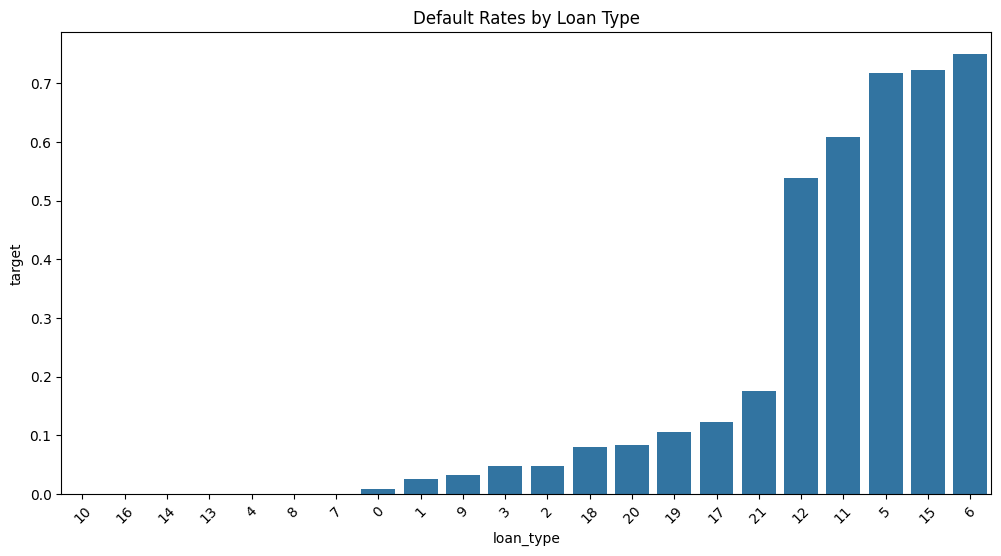

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='loan_type', y='target', ci=None, order=loan_type_analysis.index)
plt.xticks(rotation=45)
plt.title("Default Rates by Loan Type")
plt.show()

In [ ]:
def map_risk_category(loan_type):
    if loan_type in [10, 16, 14, 13, 4, 8, 7]:
        return 'Low Risk'
    elif loan_type in [0, 1, 9, 3, 2]:
        return 'Moderate Risk'
    elif loan_type in [18, 20, 19, 17, 21]:
        return 'High Risk'
    else:
        return 'Very High Risk'

loan_risk_target_mean = train.groupby('loan_type')['target'].mean().to_dict()

test['loan_type_risk'] = test['loan_type'].apply(map_risk_category)
test['loan_type_risk'] = test['loan_type_risk'].map(loan_risk_target_mean)

In [ ]:
test['repayment_ratio'] = test['Total_Amount_to_Repay'] / test['Total_Amount']
train['repayment_ratio'] = train['Total_Amount_to_Repay'] / train['Total_Amount']

train['log_Total_Amount'] = np.log1p(train['Total_Amount'])
test['log_Total_Amount'] = np.log1p(test['Total_Amount'])

<ipython-input-33-41f8e060bd18>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")


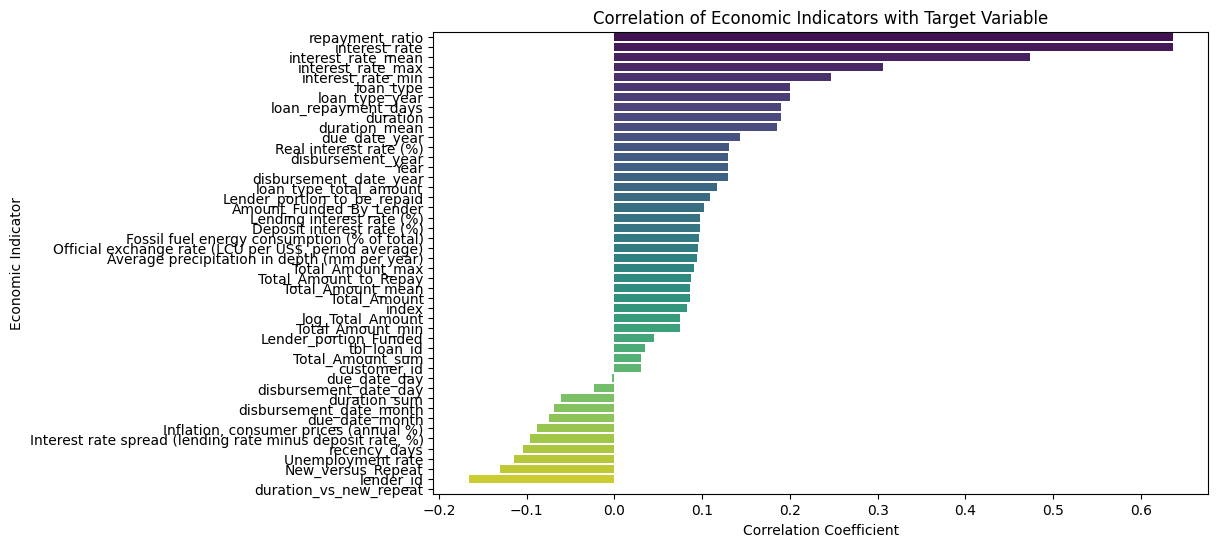

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train.select_dtypes(include=np.number).columns

correlation_matrix = train[numeric_cols].corr()

target_correlations = correlation_matrix['target'].drop('target')

sorted_correlations = target_correlations.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")
plt.title('Correlation of Economic Indicators with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Economic Indicator')
plt.show()

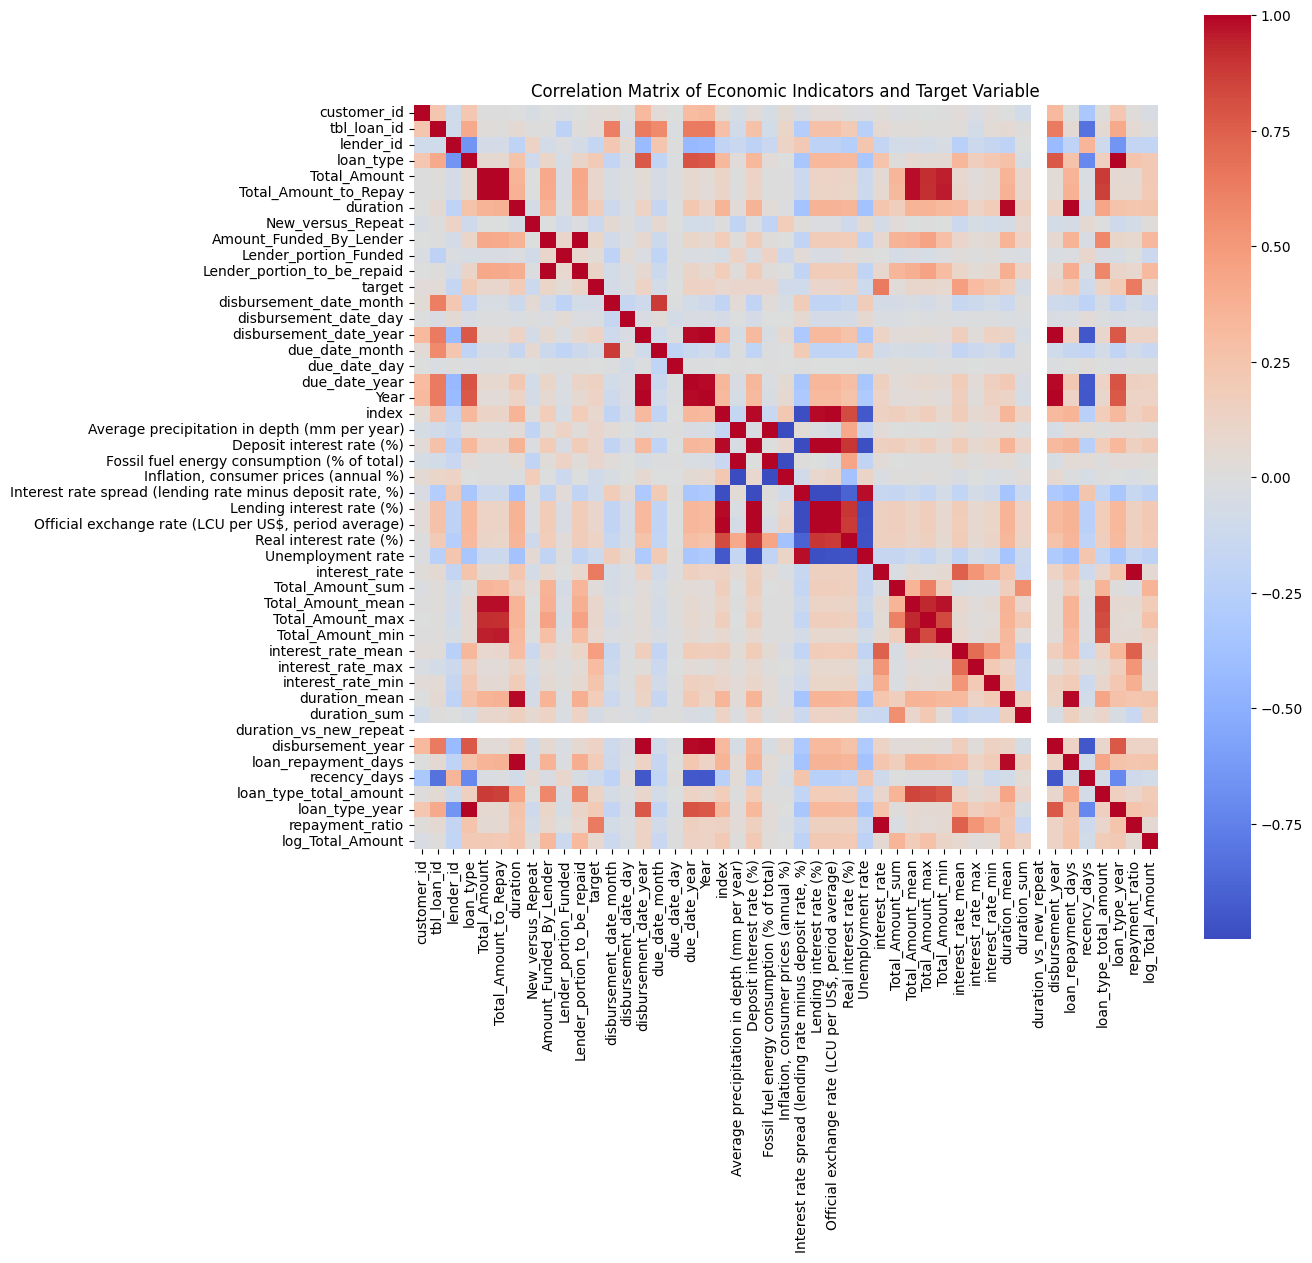

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train.select_dtypes(include=np.number).columns

correlation_matrix = train[numeric_cols].corr()

plt.figure(figsize=(12,12 ))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Correlation Matrix of Economic Indicators and Target Variable")
plt.show()

In [ ]:
target_counts = train['target'].value_counts()
target_counts

,count
target,
0,606564
1,11322


<ipython-input-36-55d336dc3cf8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


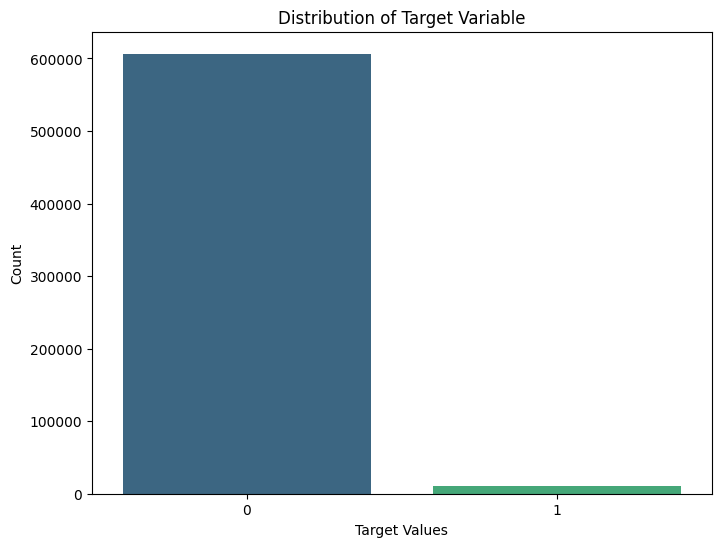

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_counts = train['target'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title('Distribution of Target Variable')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, classification_report

correlation_threshold = 0.3

correlation_matrix = train.select_dtypes(include=np.number).corr()
target_correlation = correlation_matrix["target"].sort_values(ascending=False)

selected_features = target_correlation[
    (target_correlation > correlation_threshold) | (target_correlation < -correlation_threshold)
].index.drop("target")

X = train[selected_features]
y = train["target"]
X_test = test[selected_features]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

val_predictions = (model.predict(X_val) > 0.5).astype("int32")
test_predictions = (model.predict(X_test) > 0.5).astype("int32")

val_f1_score = f1_score(y_val, val_predictions)
print(f"Validation F1 Score: {val_f1_score:.4f}")

print("Validation Classification Report:\n", classification_report(y_val, val_predictions))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6759/6759 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9831 - loss: 0.0648 - val_accuracy: 0.9881 - val_loss: 0.0319
Epoch 2/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9878 - loss: 0.0326 - val_accuracy: 0.9882 - val_loss: 0.0311
Epoch 3/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9877 - loss: 0.0320 - val_accuracy: 0.9881 - val_loss: 0.0304
Epoch 4/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9882 - loss: 0.0308 - val_accuracy: 0.9893 - val_loss: 0.0301
Epoch 5/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9884 - loss: 0.0304 - val_accuracy: 0.9882 - val_loss: 0.0300
Epoch 6/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9888 - loss: 0.0300 - val_accuracy: 0.9897 - val_loss: 0.0293
Epoch 7/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9884 - loss: 0.0307 - val_accuracy: 0.9900 - val_loss: 0.0292
Epoch 8/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9887 - loss: 0.0300 - val_acc

In [ ]:
test['ID']

,ID
0,ID_269404226088267278
1,ID_269404226088267278
2,ID_269404226088267278
3,ID_269404226088267278
4,ID_269404226088267278
...,...
167341,ID_248929241821267278
167342,ID_248929241821267278
167343,ID_248929241821267278
167344,ID_248929241821267278


In [ ]:
submission = pd.DataFrame({
    'ID': test['ID'],
    'Target': test_predictions.flatten()
})

submission.to_csv('submission2.csv', index=False)
print("Submission file saved as 'submission2.csv'.")

Submission file saved as 'submission2.csv'.
